<a href="https://colab.research.google.com/github/lukasgala19/Zadanie_LG/blob/main/Zadanie_LG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale

In [9]:
Transactions = pd.read_excel('Data.xlsx',sheet_name=0)

In [10]:
print(Transactions)

     Transaction ID       Date               Product name  Quantity
0                 1 2022-02-01           Samsung QN55Q80T         1
1                 1 2022-02-01        Apple iPhone 12 Pro         1
2                 2 2022-02-02         Lenovo Tab P11 Pro         2
3                 2 2022-02-02         Xiaomi Poco X3 Pro         1
4                 3 2022-02-03  Bose QuietComfort Earbuds         2
..              ...        ...                        ...       ...
136              77 2022-05-27                LG 75NANO81         1
137              77 2022-05-27     Samsung Galaxy Tab S7+         1
138              78 2022-05-29  Bose QuietComfort Earbuds         2
139              78 2022-05-29        Apple iPhone 12 Pro         1
140              78 2022-05-29                LG OLED55CX         1

[141 rows x 4 columns]


In [11]:
Products = pd.read_excel('Data.xlsx',sheet_name=1)

In [12]:
print(Products)

                 Product name          Category  Price
0                JBL Charge 4             Audio   2990
1   Bose QuietComfort Earbuds             Audio   7490
2             Sony WH-1000XM4             Audio  10490
3                 LG OLED55CX          Televize  38990
4            Samsung QN55Q80T          Televize  29990
5                 LG 75NANO81          Televize  44990
6         Apple iPhone 12 Pro  Mobilní telefony  27990
7    Samsung Galaxy S21 Ultra  Mobilní telefony  25490
8          Xiaomi Poco X3 Pro  Mobilní telefony   5690
9              Apple iPad Air           Tablety  17990
10     Samsung Galaxy Tab S7+           Tablety  24990
11         Lenovo Tab P11 Pro           Tablety  11990


In [20]:
spojene_df = pd.merge(Transactions,Products,on='Product name')

In [31]:
print(spojene_df.head)

<bound method NDFrame.head of      Transaction ID       Date               Product name  Quantity  \
0                 1 2022-02-01           Samsung QN55Q80T         1   
1                 1 2022-02-01        Apple iPhone 12 Pro         1   
2                 2 2022-02-02         Lenovo Tab P11 Pro         2   
3                 2 2022-02-02         Xiaomi Poco X3 Pro         1   
4                 3 2022-02-03  Bose QuietComfort Earbuds         2   
..              ...        ...                        ...       ...   
136              77 2022-05-27                LG 75NANO81         1   
137              77 2022-05-27     Samsung Galaxy Tab S7+         1   
138              78 2022-05-29  Bose QuietComfort Earbuds         2   
139              78 2022-05-29        Apple iPhone 12 Pro         1   
140              78 2022-05-29                LG OLED55CX         1   

             Category  Price  
0            Televize  29990  
1    Mobilní telefony  27990  
2             Tablety  1

In [32]:
print(spojene_df.iloc[105])

Transaction ID                     64
Date              2022-04-23 00:00:00
Product name       Xiaomi Poco X3 Pro
Quantity                            1
Category             Mobilní telefony
Price                            5690
Name: 105, dtype: object


In [33]:
print(spojene_df[spojene_df["Category"].isna()])

Empty DataFrame
Columns: [Transaction ID, Date, Product name, Quantity, Category, Price]
Index: []


In [46]:
spojene_df["Product Revenue"] = spojene_df["Price"] * spojene_df["Quantity"]

In [47]:
spojene_df["Month"] = spojene_df["Date"].dt.month

In [48]:
print(spojene_df.head)

<bound method NDFrame.head of      Transaction ID       Date               Product name  Quantity  \
0                 1 2022-02-01           Samsung QN55Q80T         1   
1                 1 2022-02-01        Apple iPhone 12 Pro         1   
2                 2 2022-02-02         Lenovo Tab P11 Pro         2   
3                 2 2022-02-02         Xiaomi Poco X3 Pro         1   
4                 3 2022-02-03  Bose QuietComfort Earbuds         2   
..              ...        ...                        ...       ...   
136              77 2022-05-27                LG 75NANO81         1   
137              77 2022-05-27     Samsung Galaxy Tab S7+         1   
138              78 2022-05-29  Bose QuietComfort Earbuds         2   
139              78 2022-05-29        Apple iPhone 12 Pro         1   
140              78 2022-05-29                LG OLED55CX         1   

             Category  Price  ProductRevenue  Month  Product Revenue  
0            Televize  29990           29990  

In [68]:
total_product_revenue_by_category = spojene_df.groupby("Category")["Product Revenue"].sum().reset_index()

In [97]:
print(total_product_revenue_by_category)

           Category  Product Revenue
0             Audio           416370
1  Mobilní telefony           614460
2           Tablety           623660
3          Televize          1205680


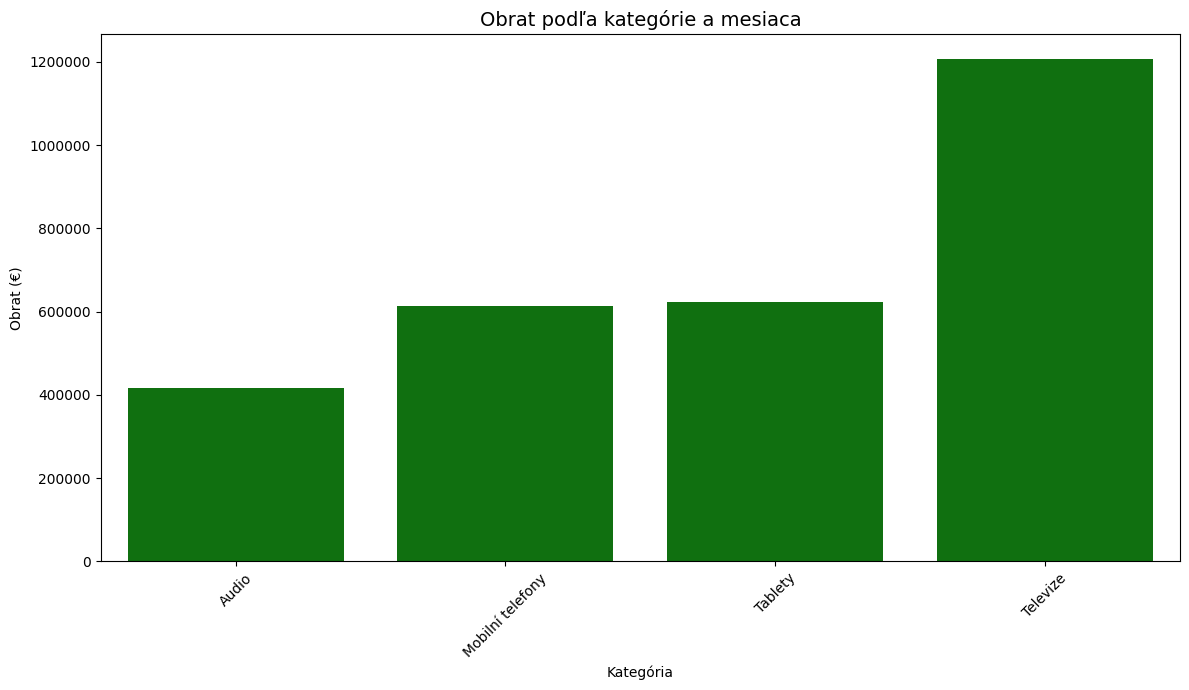

In [103]:
plt.figure(figsize=(12, 7))
sns.barplot(data=total_product_revenue_by_category, x="Category", y="Product Revenue",color="green")
plt.title("Obrat podľa kategórie a mesiaca", fontsize=14)
plt.xlabel("Kategória")
plt.ylabel("Obrat (€)")
plt.xticks(rotation=45)
# 👉 Zmeniť z vedeckého zápisu (1e6) na normálne čísla
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [71]:
total_produt_revenue_by_category_month = spojene_df.groupby(["Category", "Month"])["Product Revenue"].sum().reset_index()

In [99]:
print(total_produt_revenue_by_category_month)

            Category  Month  Product Revenue
0              Audio      2           130310
1              Audio      3           107820
2              Audio      4           107840
3              Audio      5            70400
4   Mobilní telefony      2           208690
5   Mobilní telefony      3           157710
6   Mobilní telefony      4           177510
7   Mobilní telefony      5            70550
8            Tablety      2           188890
9            Tablety      3           164910
10           Tablety      4           171910
11           Tablety      5            97950
12          Televize      2           290920
13          Televize      3           380900
14          Televize      4           266930
15          Televize      5           266930


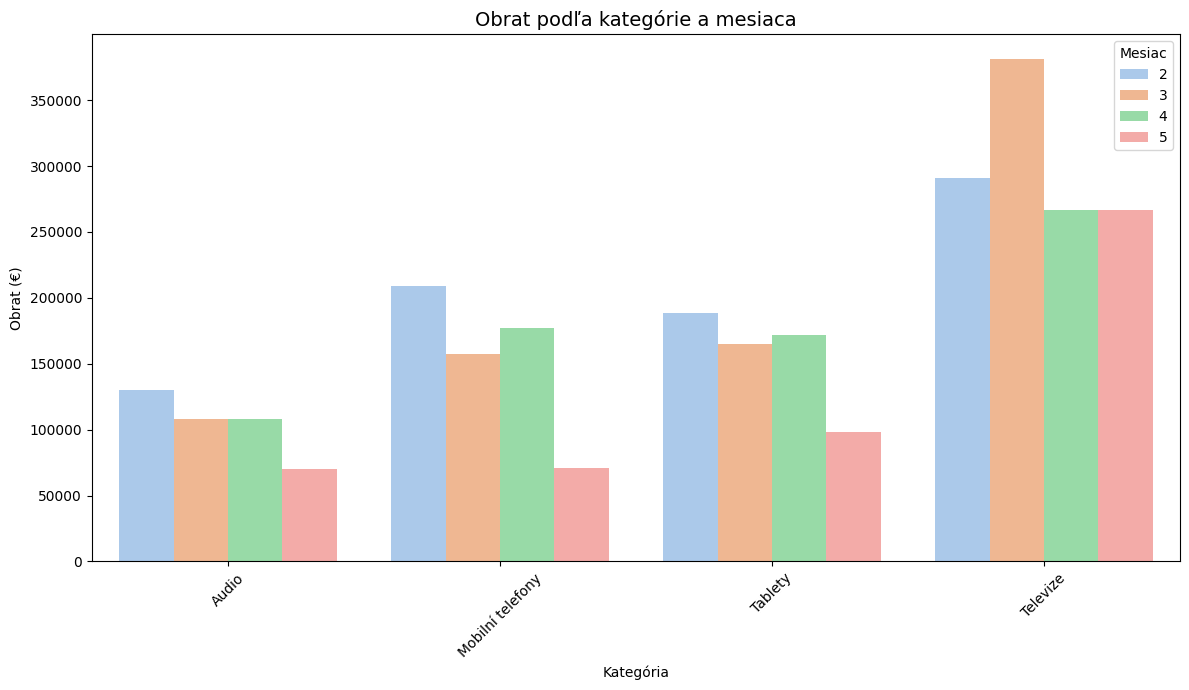

In [101]:
plt.figure(figsize=(12, 7))
sns.barplot(data=total_produt_revenue_by_category_month, x="Category", y="Product Revenue", hue="Month", palette="pastel")

plt.title("Obrat podľa kategórie a mesiaca", fontsize=14)
plt.xlabel("Kategória")
plt.ylabel("Obrat (€)")
plt.xticks(rotation=45)
plt.legend(title="Mesiac")
plt.tight_layout()
plt.show()

###Uloha 2###

In [106]:
spojene_df["Day of week"] = spojene_df["Date"].dt.day_name()

In [107]:
print(spojene_df.head)

<bound method NDFrame.head of      Transaction ID       Date               Product name  Quantity  \
0                 1 2022-02-01           Samsung QN55Q80T         1   
1                 1 2022-02-01        Apple iPhone 12 Pro         1   
2                 2 2022-02-02         Lenovo Tab P11 Pro         2   
3                 2 2022-02-02         Xiaomi Poco X3 Pro         1   
4                 3 2022-02-03  Bose QuietComfort Earbuds         2   
..              ...        ...                        ...       ...   
136              77 2022-05-27                LG 75NANO81         1   
137              77 2022-05-27     Samsung Galaxy Tab S7+         1   
138              78 2022-05-29  Bose QuietComfort Earbuds         2   
139              78 2022-05-29        Apple iPhone 12 Pro         1   
140              78 2022-05-29                LG OLED55CX         1   

             Category  Price  ProductRevenue  Month  Product Revenue  \
0            Televize  29990           29990 

In [118]:
orders_per_day = spojene_df.groupby("Day of week").size().sort_values(ascending=False)
print(orders_per_day)

# Pre pekné zoradenie podľa týždňa
#days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#orders_per_day = orders_per_day.reindex(days_order)#


# Deň s najviac objednávkami:
print("Nejsilnější den v týdnu na počet objednávek je:", orders_per_day.idxmax())

Day of week
Saturday     29
Monday       25
Wednesday    22
Friday       20
Tuesday      16
Thursday     15
Sunday       14
dtype: int64
Nejsilnější den v týdnu na počet objednávek je: Saturday
